# Data Preprocessing, Exploration & Visualizations

In [1]:
data <- read.csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")
str(data)

'data.frame':	1000 obs. of  17 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ City                   : Factor w/ 3 levels "Mandalay","Naypyitaw",..: 3 2 3 3 3 2 3 2 3 1 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax.5.                 : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Fac

The feature invoice id is of no use for us. So let us drop the feature. We also need to check if there are any missing values in the data set. Additionally lets take a look at the summary statistics of the same. Additionally, lets convert the Date to a standardized format. 

In [2]:
library(lubridate)
data_removed <- data[,-1]
data_removed$Date <- as.Date(data_removed$Date, "%m/%d/%y")
year(data_removed$Date) <- 2019
sapply(data_removed, function(x) sum(is.na(x)))
summary(data_removed)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Branch                    City           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                  Tax.5.                   Total 
                      0                       0                       0 
                   Date                    Time                 Payment 
                      0                       0                       0 
                   cogs gross.margin.percentage            gross.income 
                      0                       0                       0 
                 Rating 
                      0

 Branch         City     Customer.type    Gender   
 A:340   Mandalay :332   Member:501    Female:501  
 B:332   Naypyitaw:328   Normal:499    Male  :499  
 C:328   Yangon   :340                             
                                                   
                                                   
                                                   
                                                   
                 Product.line   Unit.price       Quantity         Tax.5.       
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
                        

Lets try and arrive at some notable insights. First lets take a look into the branches customers rated high/low.

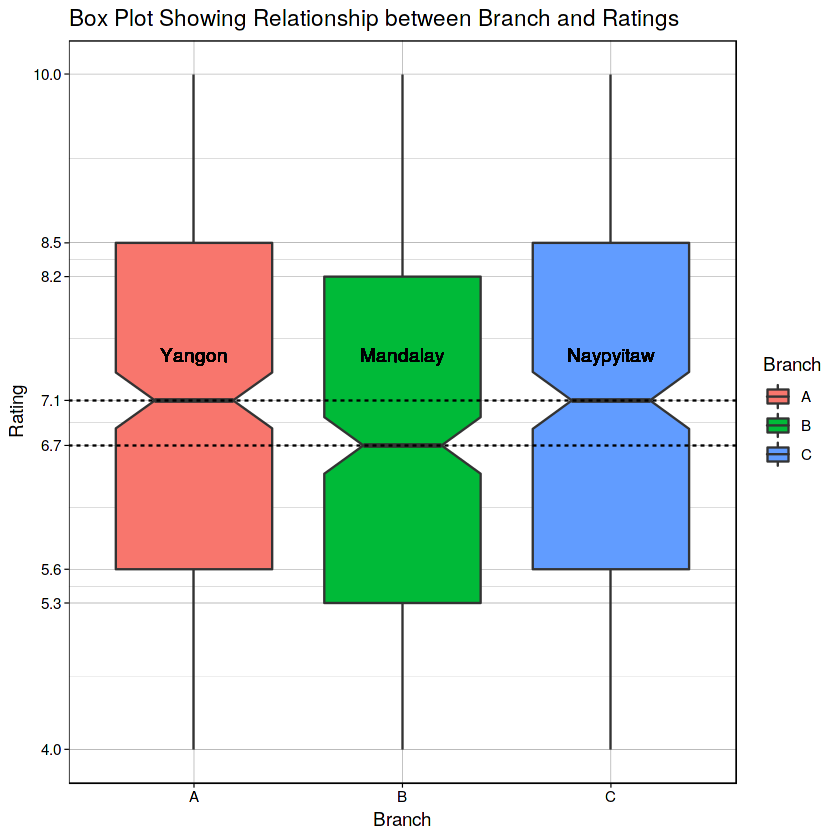

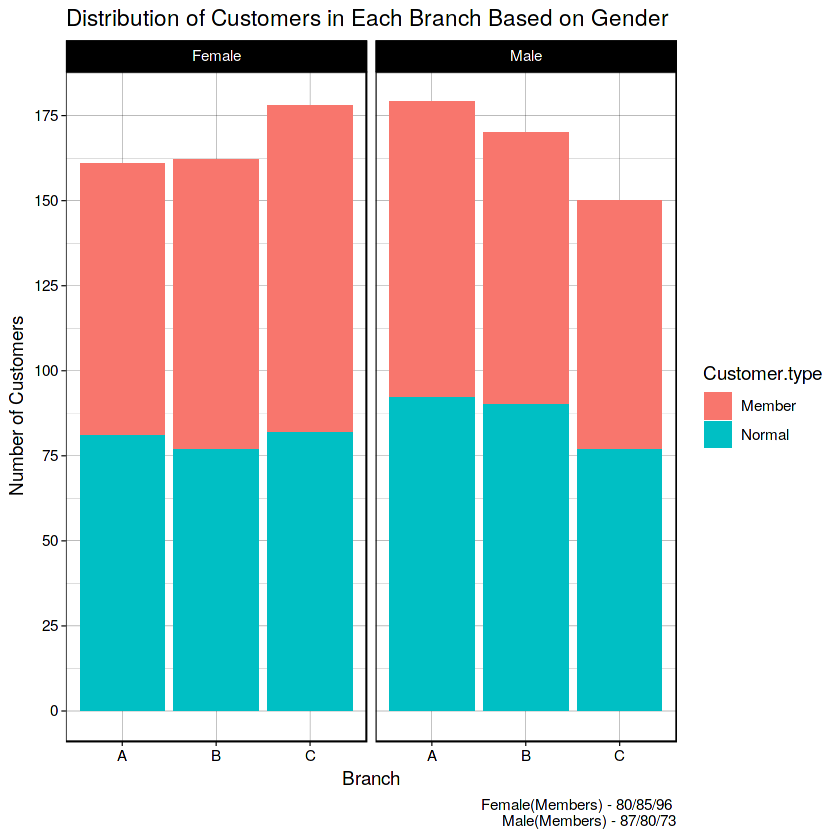

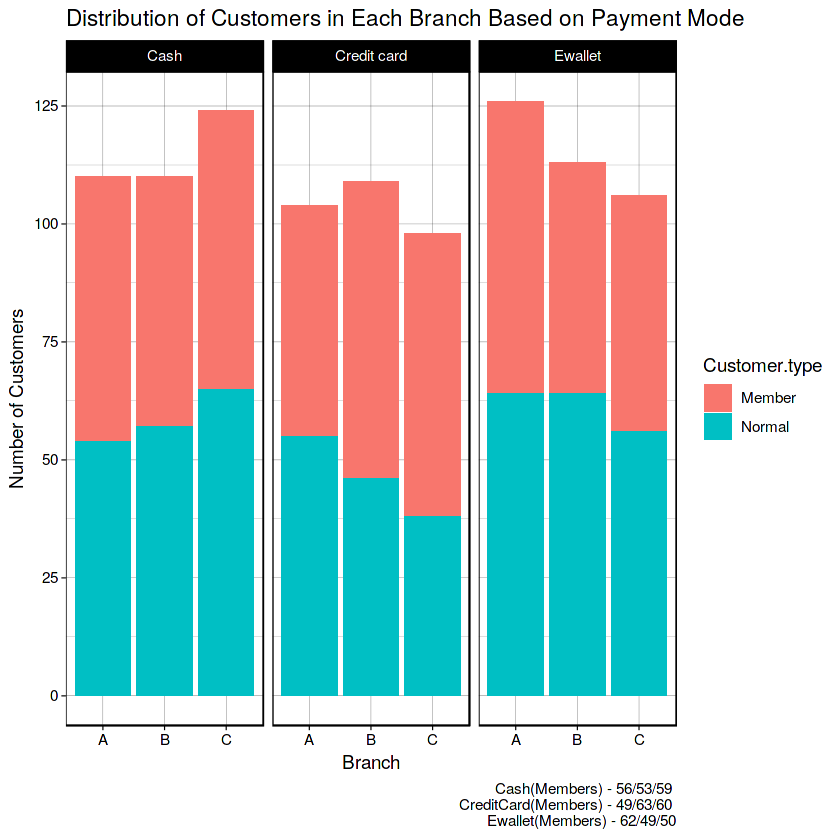

In [3]:
library(ggplot2)
library(gridExtra)

ggplot(data = data_removed, mapping = aes(x = Branch, y = Rating)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch)) +
theme_linedraw() + ggtitle("Box Plot Showing Relationship between Branch and Ratings") + xlab("Branch")+ ylab("Rating")+
geom_hline(mapping = aes(yintercept = 7.1), linetype = "dashed") + geom_hline(mapping = aes(yintercept = 6.7), linetype = "dashed") +
geom_text(mapping = aes(x = "A", y = 7.5, label = "Yangon")) + geom_text(mapping = aes(x = "B", y = 7.5, label = "Mandalay")) + geom_text(mapping = aes(x = "C", y = 7.5, label = "Naypyitaw")) +
scale_y_continuous(breaks = c(4,5.3,5.6,6.7,7.1,8.2,8.5,10))

p <- ggplot(data = data_removed, mapping = aes(x = Branch)) + geom_bar(mapping = aes(fill = Customer.type)) + 
theme_linedraw() + ggtitle("Distribution of Customers in Each Branch Based on Gender") + xlab("Branch") + ylab("Number of Customers") 
p + facet_wrap(data_removed$Gender) + scale_y_continuous(breaks = c(0, 25, 50, 75, 100, 125, 150, 175)) + labs(caption = "Female(Members) - 80/85/96 \n Male(Members) - 87/80/73")

g <- ggplot(data = data_removed, mapping = aes(x = Branch)) + geom_bar(mapping = aes(fill = Customer.type)) + 
theme_linedraw() + ggtitle("Distribution of Customers in Each Branch Based on Payment Mode")+ xlab("Branch") + ylab("Number of Customers") 
g + facet_wrap(data_removed$Payment) + scale_y_continuous(breaks = c(0, 25, 50, 75, 100, 125, 150, 175)) + labs(caption = "Cash(Members) - 56/53/59 \n CreditCard(Members) - 49/63/60 \n Ewallet(Members) - 62/49/50")


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




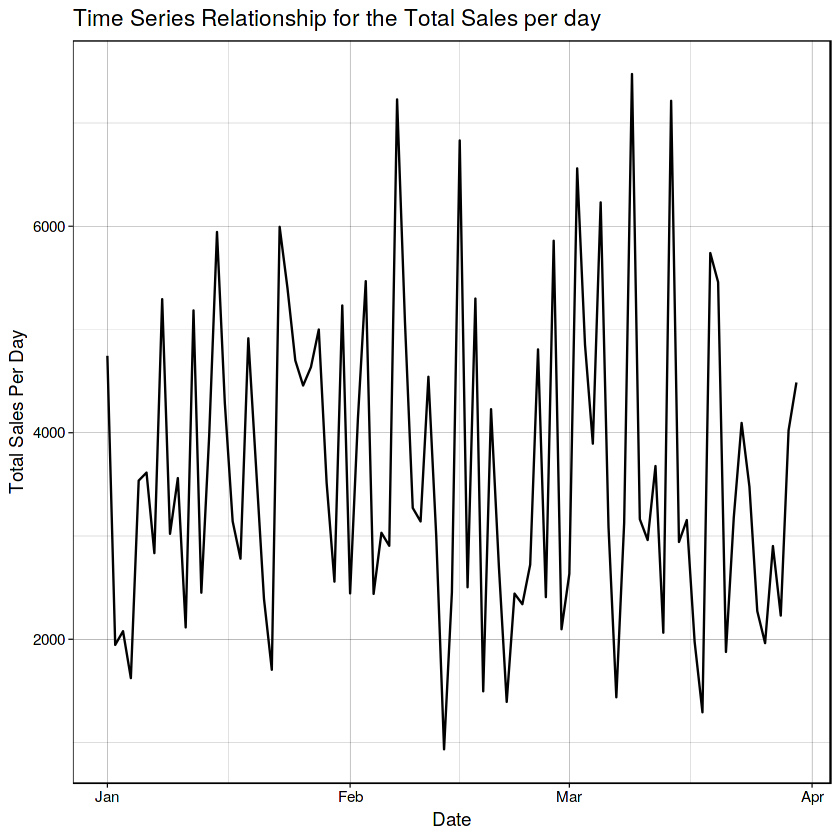

In [4]:
library(dplyr)
total_sales_per_day <- data.frame(xtabs(formula=Total~Date, data=data_removed))
total_sales_per_day$Date <- as.Date(total_sales_per_day$Date)

ggplot(data = total_sales_per_day, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day")+ xlab("Date")+ ylab("Total Sales Per Day")

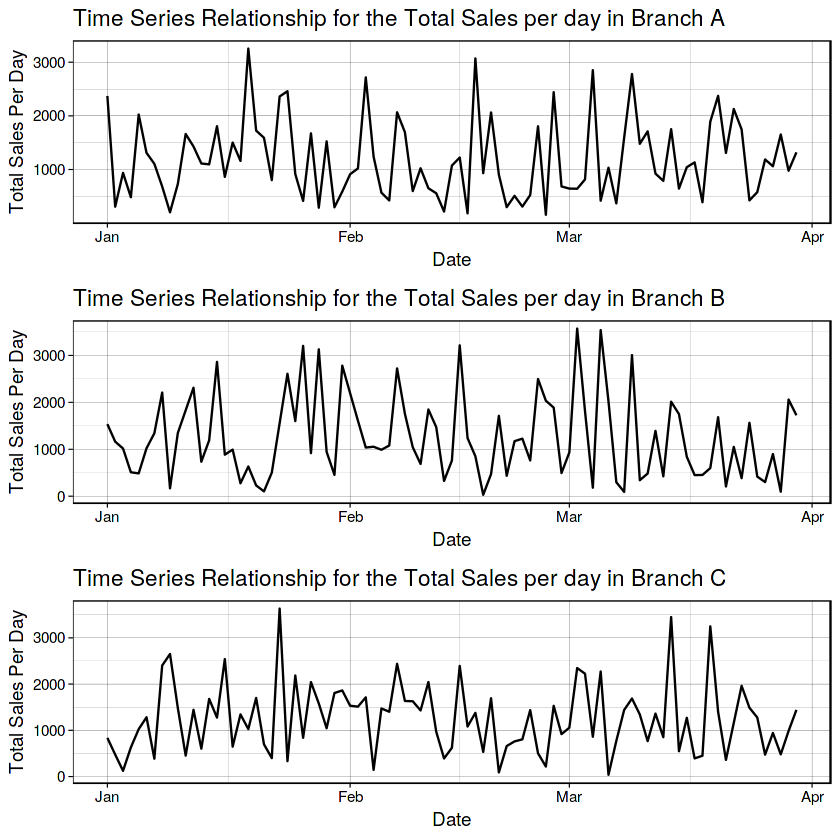

In [5]:
library(gridExtra)
A <- data_removed %>% filter(Branch == "A")
total_A <- data.frame(xtabs(formula = Total~Date, data = A))
total_A$Date <- as.Date(total_A$Date)
B <- data_removed %>% filter(Branch == "B")
total_B <- data.frame(xtabs(formula = Total~Date, data = B))
total_B$Date <- as.Date(total_B$Date)
C <- data_removed %>% filter(Branch == "C")
total_C <- data.frame(xtabs(formula = Total~Date, data = C))
total_C$Date <- as.Date(total_C$Date)

plot1 <- ggplot(data = total_A, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch A")+ xlab("Date")+ ylab("Total Sales Per Day")
plot2 <- ggplot(data = total_B, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch B")+ xlab("Date")+ ylab("Total Sales Per Day")
plot3 <- ggplot(data = total_C, mapping = aes(x = Date, y = Freq))+ geom_line()+
theme_linedraw()+ ggtitle("Time Series Relationship for the Total Sales per day in Branch C")+ xlab("Date")+ ylab("Total Sales Per Day")

grid.arrange(plot1, plot2, plot3)

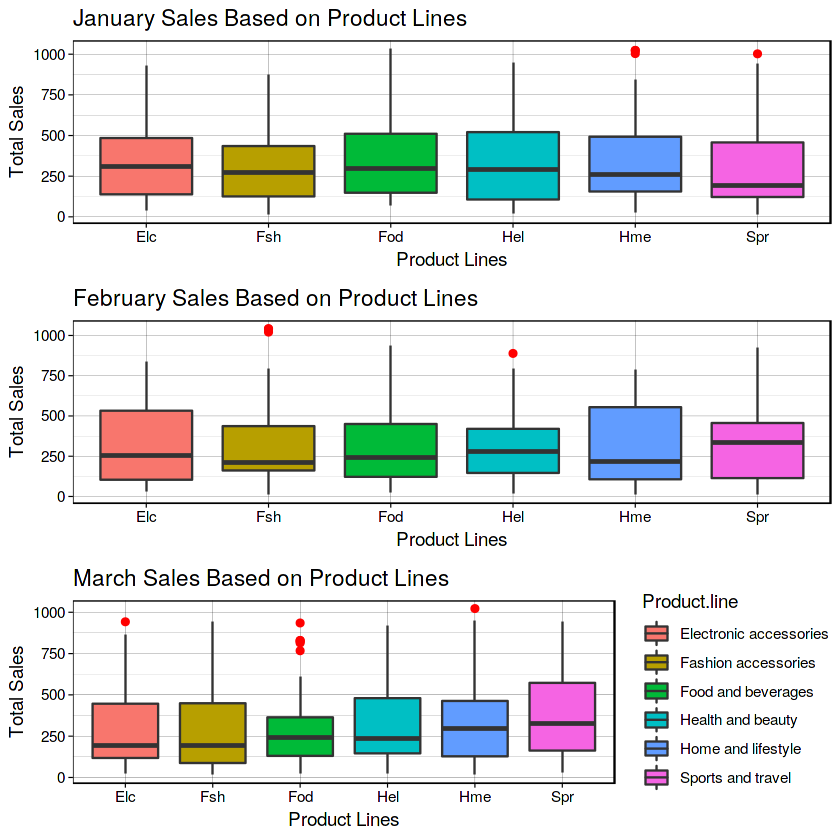

In [6]:
Jan_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 1)
p1 <- ggplot(data = Jan_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red", show.legend = FALSE) +
scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) +
theme_linedraw() + ggtitle("January Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")

Feb_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 2)
p2 <- ggplot(data = Feb_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red", show.legend = FALSE) +
scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) +
theme_linedraw() + ggtitle("February Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")

Mar_sales <- data_removed %>% mutate(month = month(Date)) %>% filter(month == 3)
p3 <- ggplot(data = Mar_sales, mapping = aes(x = Product.line, y = Total))+ geom_boxplot(mapping = aes(fill = Product.line), outlier.color = "red")+
scale_x_discrete(labels = c("Elc", "Fsh", "Fod", "Hel", "Hme", "Spr")) +
theme_linedraw() + ggtitle("March Sales Based on Product Lines") + xlab("Product Lines") + ylab("Total Sales")

grid.arrange(p1,p2,p3) 

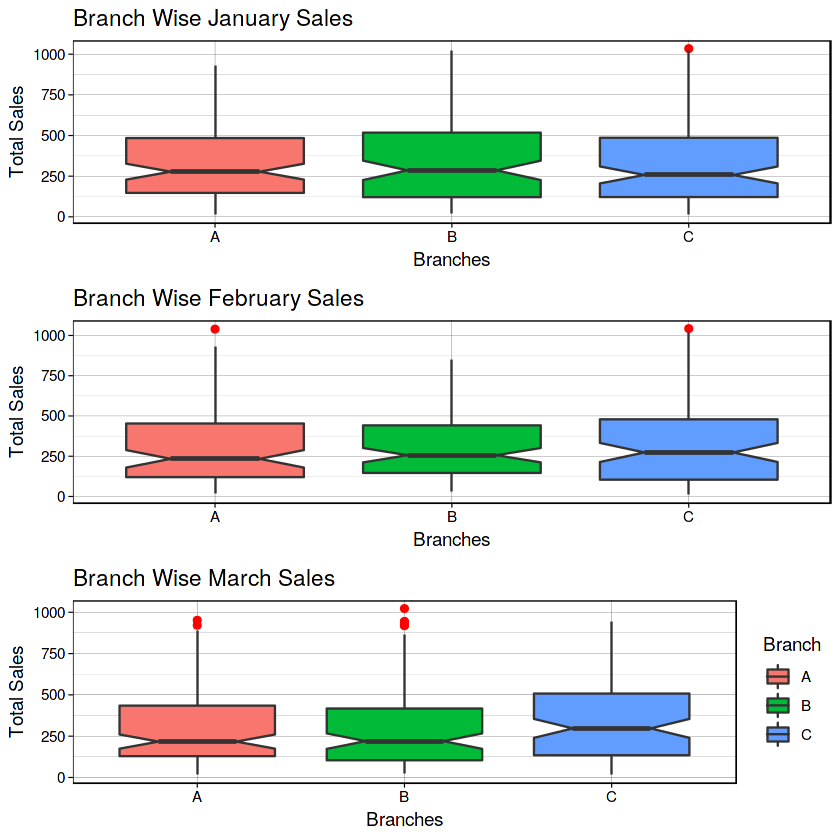

In [7]:
p1 <- ggplot(data = Jan_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red", show.legend = FALSE) +
theme_linedraw() + ggtitle("Branch Wise January Sales") + xlab("Branches") + ylab("Total Sales")
p2 <- ggplot(data = Feb_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red", show.legend = FALSE) +
theme_linedraw() + ggtitle("Branch Wise February Sales") + xlab("Branches") + ylab("Total Sales")
p3 <- ggplot(data = Mar_sales, mapping = aes(x = Branch, y = Total)) + geom_boxplot(notch = TRUE, mapping = aes(fill = Branch), outlier.color = "red") +
theme_linedraw() + ggtitle("Branch Wise March Sales") + xlab("Branches") + ylab("Total Sales")

grid.arrange(p1,p2,p3)